##1. Библиотека numpy. Вычислительные задачи

In [ ]:
import numpy as np

####Задание 1
Создайте numpy array с элементами от числа N до 0 (например, для N = 10 это будет array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])).

In [ ]:
N = int(input('Your input: '))

my_array = np.arange(0, N)[::-1]

print(my_array)

###Задание 2
Создайте диагональную матрицу с элементами от N до 0. Посчитайте сумму ее значений на диагонали.

In [ ]:
n=int(input('Your input: '))

my_matrix = np.diag(np.arange(n, 0, -1))

print(my_matrix)

print(sum(sum(my_matrix)))

Your input: 9
[[9 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1]]
45


###Задание 3
Решите систему уравнений:

4x + 2y + z = 4

x + 3y = 12

5y + 4z = -3

In [ ]:
from numpy import linalg

In [ ]:
a = np.array([[4, 2, 1], [1, 3, 0], [0, 5, 4]])

b = np.array([4, 12, -3])

linalg.solve(a, b)

array([ 0.46666667,  3.84444444, -5.55555556])

###Задание 4
Имеется матрица покупок в интернет-магазине. Столбец А - ID пользователя. Остальные столбцы - количество покупок категорий товаров этим пользователем:


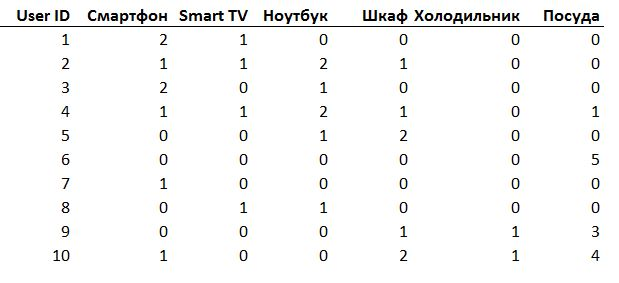

Матрица в виде numpy array:

In [ ]:
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ], 
    np.int32
)

На сайт заходит очередной посетитель, о покупках которого известно следующее:

In [ ]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Найдите самого похожего пользователя. Т. е. посчитайте косинусное сходство между этим пользователем и всеми пользователями из массива user_stats.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def cosine(users_stats, next_user_stats):

    for i, row in enumerate(users_stats):
    # print(row)

      users = np.sqrt((users_stats * users_stats).sum())
      new_user = np.sqrt((next_user_stats * next_user_stats).sum())

      k_per_user = np.dot(users_stats, next_user_stats) / (users * new_user)

      best_user = np.argmax(k_per_user) # спасибо Stack Overflow))

      return best_user

In [ ]:
cosine(users_stats, next_user_stats)

1

##2. Библиотека Pandas

In [ ]:
import pandas as pd

###Задание 1
Скачайте с сайта grouplens.org...movielens/ датасет любого размера. Определите какому фильму было выставлено больше всего оценок 5.0.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
movies_data = ratings.merge(movies, on='movieId', how='left')
movies_data = movies_data[movies_data.rating == 5.0]
movies_data = movies_data.groupby('title')[['rating']].count()
movies_data.sort_values('rating', ascending = False).reset_index().head(1)

,title,rating
0,"Shawshank Redemption, The (1994)",153


###Задание 2
По данным файла <i>power.csv</i> посчитайте суммарное потребление стран Прибалтики (Латвия, Литва и Эстония) категорий 4, 12 и 21 за период с 2005 по 2010 года. Не учитывайте в расчетах отрицательные значения quantity.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
pd.read_csv('power.csv').head(5)

In [ ]:
summa = 0

data = pd.read_csv('power.csv')

data2 = data[((data['year'] >= 2005) & (data['year'] <= 2010) & (data['quantity'] > 0)) & ((data['country'] == 'Latvia') | (data['country'] == 'Lithuania') | (data['country'] == 'Estonia'))]

data3 = data2[data2.category.isin([4,12,21])]

summa = data3['quantity'].sum()

print(f'Суммарное потребление: {summa}')

###Задание 3
Выберите страницу любого сайта с табличными данными. Импортируйте таблицы в pandas dataframe.

Примеры страниц (необязательно брать именно эти):

https://fortrader.org/quotes

www.finanz.ru...om-vremeni

In [ ]:
page_url = 'https://pythonworld.ru/tipy-dannyx-v-python/stroki-funkcii-i-metody-strok.html'

data_fr = pd.read_html(page_url, encoding='utf-8')

In [ ]:
data_fr
#не шибко красиво, но что-то

[                                    Функция или метод                                         Назначение
 0   S = 'str'; S = "str"; S = '''str'''; S = """st...                                     Литералы строк
 1                                  S = "s\np\ta\nbbb"                  Экранированные последовательности
 2                                  S = r"C:\temp\new"  Неформатированные строки (подавляют экранирова...
 3                                         S = b"byte"                                      Строка байтов
 4                                             S1 + S2                      Конкатенация (сложение строк)
 5                                              S1 * 3                                  Повторение строки
 6                                                S[i]                               Обращение по индексу
 7                                         S[i:j:step]                                   Извлечение среза
 8                                            

##3. Функции и работа с данными

In [ ]:
import pandas as pd

###Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
rating = pd.read_csv('ratings.csv')

rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
mov = pd.read_csv('movies.csv')

mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
mov_rat = mov.merge(rating, on='movieId', how='left')

In [ ]:
def classify(row):
    if row.rating >= 4.5:
      return 'высокий рейтинг'

    elif 2 < row.rating < 4.5:
      return 'средний рейтинг'

    elif row.rating <= 2:
      return 'низкий рейтинг'
        
mov_rat['class'] = mov_rat.apply(classify, axis = 1)

mov_rat.loc[ :10]

,movieId,title,genres,userId,rating,timestamp,class
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08,средний рейтинг
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08,средний рейтинг
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09,высокий рейтинг
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08,низкий рейтинг
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08,средний рейтинг
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20.0,3.5,1.238730e+09,средний рейтинг
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23.0,3.0,1.148730e+09,средний рейтинг
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,26.0,5.0,1.360088e+09,высокий рейтинг
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30.0,4.0,9.449431e+08,средний рейтинг
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,37.0,4.0,9.813081e+08,средний рейтинг


###Задание 2
Используем файл <i>keywords.csv</i>.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

Результат классификации запишите в отдельный столбец region.

In [ ]:
geo_data = {
  
  'Центр': ['москва', 'тула', 'ярославль'],
  'Северо-Запад': ['петербург', 'псков', 'мурманск'],
  'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving keywords.csv to keywords.csv


In [ ]:
df_keys = pd.read_csv('keywords.csv')

In [ ]:
df_keys['keyword']

0                             вк
1                  одноклассники
2                          порно
3                           ютуб
4                      вконтакте
                  ...           
99995     эльдорадо старый оскол
99996        frigate для firefox
99997                     укрсиб
99998    погода в ялте на неделю
99999                       ггму
Name: keyword, Length: 100000, dtype: object

In [ ]:
q = df_keys['keyword'].values

def key_region(q):
  for region, city_list in geo_data.items():
    for city in city_list:
      if city in q:
        return region

  return 'undefined'

array(['вк', 'одноклассники', 'порно', ..., 'укрсиб',
       'погода в ялте на неделю', 'ггму'], dtype=object)

In [ ]:
df_keys['region'] = df_keys['keyword'].apply(key_region)

In [ ]:
df_keys[df_keys['region'] != 'undefined']

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
...,...,...,...
99590,авито ярославль автомобили с пробегом,3673,Центр
99634,северпост новости мурманской области,3606,Северо-Запад
99808,полармед мурманск запись на прием,3719,Северо-Запад
99890,яндекс метро москва,4548,Центр


###Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

- для каждой строки пройдите по всем годам списка years
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [ ]:
"""
функция production_year выставляет год выпуска фильму по условию:
  - год от 1950 по 2010
  - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
  - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
"""

def production_year(film):
    years = range(1950, 2010)
    val = [x for x in years if str(x) in film['title']]
    if val:
        return val[0]
    else:
        return 1900

In [ ]:
#добавление столбца 'year'

movies['year'] = movies.apply(production_year, axis=1)

In [ ]:
#объединение DFs и подсчёт среднего рейтинга

merged = movies.merge(ratings, on = 'movieId', how = 'left')

grouped_dfs = merged.groupby('year').rating.mean().reset_index()

grouped_dfs.sort_values('rating', ascending = False)

#исключение фильмов без года (не в range(1950, 2010)), им всем присвоен 1900-й год

grouped_dfs_excluded = grouped_dfs[grouped_dfs['year'] != 1900] 

grouped_dfs_excluded[:20]

,year,rating
1,1950,3.915254
2,1951,3.983539
3,1952,4.000000
4,1953,3.754587
5,1954,3.994220
6,1955,3.751724
7,1956,3.617647
8,1957,4.014241
9,1958,3.823171
10,1959,3.841033


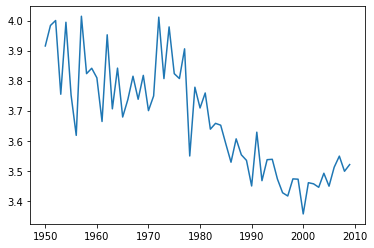

In [ ]:
import matplotlib.pyplot as plt

plt.plot(grouped_dfs_excluded['year'], grouped_dfs_excluded['rating'])

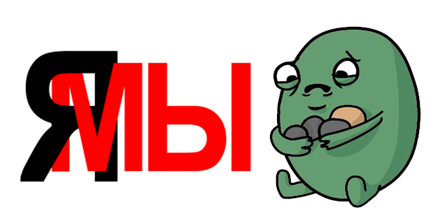

##4. Продвинутый pandas

In [ ]:
import pandas as pd

###Задание 1

Для датафрейма <i>visit_log</i> из материалов занятия создайте столбец source_type по следующим правилам:

- если источник traffic_source равен yandex или google, то в source_type ставится organic
- для источников paid и email из России - ставим ad
- для источников paid и email не из России - ставим other
- все остальные варианты берем из traffic_source без изменений

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving visit_log.csv to visit_log.csv


In [ ]:
visit_log = pd.read_csv('visit_log.csv', sep = ';')

visit_log.head()

,timestamp,visit_id,url,region,user_id,traffic_source
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex


In [ ]:
def rules(row):
  traffic_source = row['traffic_source']
  region = row['region']

  if (traffic_source == 'yandex' or traffic_source == 'google'):
    return 'organic'

  elif (traffic_source == 'paid' or traffic_source == 'email') and region == 'Russia':
    return 'ad'

  elif (traffic_source == 'paid' or traffic_source == 'email') and region != 'Russia': 
    return 'other'

  else:
    return traffic_source

In [ ]:
visit_log['source_type'] = visit_log.apply(rules, axis = 1)

In [ ]:
visit_log.head(20)

,timestamp,visit_id,url,region,user_id,traffic_source,source_type
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex,organic
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex,organic
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex,organic
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex,organic
5,1549980742,8855508aad,https://host.ru/df646c3676cc259fa0,Russia,fc43898e47,yandex,organic
6,1549980742,b0f66adc83,https://host.ru/b8b58337d272ee7b15,Russia,13fc55e781,paid,ad
7,1549980754,837885c8f8,https://host.ru/108ce4b365afb7b88e,Russia,cb5082b6f6,direct,direct
8,1549980760,af5570f5a1,https://host.ru/3004a8273caeef2867,China,45664f7af2,direct,direct
9,1549980765,3e7077fd2f,https://host.ru/df646c3676cc259fa0,Russia,6f9de8c8b6,email,ad


In [ ]:
#без ф-ии

visit_log.loc[(visit_log.traffic_source == 'yandex') | (visit_log.traffic_source == 'google'), 'source_type'] = 'organic'

visit_log.loc[((visit_log.traffic_source == 'paid') | (visit_log.traffic_source == 'email')) & (visit_log.region =='Russia'), 'source_type'] = 'ad'

visit_log.loc[((visit_log.traffic_source == 'paid') | (visit_log.traffic_source == 'email')) & (visit_log.region !='Russia'), 'source_type'] = 'other'

In [ ]:
visit_log.loc[visit_log.source_type.isnull(), 'source_type'] = visit_log['traffic_source']

In [ ]:
visit_log[10:20]

,timestamp,visit_id,url,region,user_id,traffic_source,source_type
10,1549980777,01d448afd9,https://host.ru/a5dda93e70318570c0,India,27e76a4a80,direct,direct
11,1549980785,71b6c1d538,https://host.ru/c8d9213a31839f9a3a,Ukraine,3b13701488,google,organic
12,1549980789,15ec7bf0b5,https://host.ru/8e88d4703848cc0ec4,Russia,6d1d81f7f8,paid,ad
13,1549980792,dd46c3eebb,https://host.ru/3004a8273caeef2867,China,7e301c8c41,direct,direct
14,1549980793,e7ecebbc59,https://host.ru/05e41944dd85a900a6,Belarus,ac52dedc3b,direct,direct
15,1549980797,5322fecfc9,https://host.ru/4adc8a29b212051b04,Belarus,9a45d98867,paid,other
16,1549980801,374708fff7,https://host.ru/39fa884393666d45fc,Russia,e9bd59e22d,google,organic
17,1549980807,0a88111852,https://host.ru/2fcb223266880ccf57,Ukraine,a2ba8fa3db,paid,other
18,1549980814,60daa3a5f7,https://host.ru/ef57543002ce2a0f2a,Belarus,72cb10fb5c,direct,direct
19,1549980816,d6fd62f5ce,https://host.ru/f1eb4601740d627ab0,Belarus,7269dcd869,direct,direct


###Задание 2

В файле URLs.txt содержатся url страниц новостного сайта. Вам необходимо отфильтровать его по адресам страниц с текстами новостей. Известно, что шаблон страницы новостей имеет внутри url следующую конструкцию: /, затем 8 цифр, затем дефис. Выполните следующие действия:

- Прочитайте содержимое файла в датафрейм
- Отфильтруйте страницы с текстом новостей, используя метод str.contains и регулярное выражение в соответствии с заданным шаблоном

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
url = pd.read_table('URLs.txt',sep='\s+', engine='python')

url.head()

,url
0,/world/
1,/latest/
2,/?updated=top
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...


In [ ]:
url[url.url.str.contains('\d{8}-')].head(10)

,url
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...
5,/science/36157853-nasa-sobiraet-ekstrennuyu-pr...
6,/video/36001498-poyavilis-pervye-podrobnosti-g...
7,/world/36007585-tramp-pridumal-kak-reshit-ukra...
10,/middleeast/36131117-divizion-s-400-ne-zametil...
11,/economics/36065674-rossiyane-vozmutilis-minim...
12,/politics/36118047-otets-24-detey-potreboval-i...
13,/travel/36194479-v-sheremetevo-passazhiry-ustr...
14,/politics/35638742-nesolidno-mariya-zaharova-s...


###Задание 3

Используйте файл с оценками фильмов ml-latest-small/ratings.csv. Посчитайте среднее время жизни пользователей, которые выставили более 100 оценок. Под временем жизни понимается разница между максимальным и минимальным значением столбца timestamp для данного значения userId.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [13]:
ratings = pd.read_csv('ratings.csv')

In [14]:
#вариант 1

(ratings
 .groupby('userId')
 .agg(
     user_live=('timestamp', np.ptp),
     rating_count=('rating', 'count'),
 )
 .query('rating_count > 100')
 ['user_live']
 .astype('timedelta64[s]')
 .mean()
)

Timedelta('517 days 17:22:47.734693888')

In [5]:
#вариант 2

ratings = ratings.groupby(['userId']).agg({'rating': 'count',
                                            'timestamp': lambda x: x.max() - x.min()})

In [6]:
ratings[ratings.rating > 100]['timestamp'].astype('timedelta64[s]').mean()

Timedelta('517 days 17:22:47.734693888')

In [7]:
#вариант 3

ratings = pd.read_csv('ratings.csv')

In [8]:
ratings = ratings.groupby(['userId']).agg(['count', 'min', 'max'])

In [9]:
def classify(row):
    return row['timestamp']['max'] - row['timestamp']['min']   

In [10]:
ratings['lifetime'] = ratings.apply(classify, axis = 1)

In [11]:
ratings[ratings['rating']['count'] > 100]['lifetime'].astype('timedelta64[s]').mean()

Timedelta('517 days 17:22:47.734693888')

###Задание 4

Дана статистика услуг перевозок клиентов компании по типам (см. файл “Python_13_join.ipynb” в разделе Материалы для лекции «Продвинутый pandas» ---- Ноутбуки к лекции «Продвинутый pandas»).
Необходимо сформировать две таблицы:
- таблицу с тремя типами выручки для каждого client_id без указания адреса клиента
- аналогичную таблицу по типам выручки с указанием адреса клиента

<i>Обратите внимание, что в процессе объединения таблиц данные не должны теряться.</i>

Дана статистика услуг перевозок клиентов компании по типам:

- rzd - железнодорожные перевозки
- auto - автомобильные перевозки
- air - воздушные перевозки
- client_base - адреса клиентов

In [ ]:
rzd = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115],
        'rzd_revenue': [1093, 2810, 10283, 5774, 981]
    }
)
rzd

,client_id,rzd_revenue
0,111,1093
1,112,2810
2,113,10283
3,114,5774
4,115,981


In [ ]:
auto = pd.DataFrame(
    {
        'client_id': [113, 114, 115, 116, 117],
        'auto_revenue': [57483, 83, 912, 4834, 98]
    }
)
auto

,client_id,auto_revenue
0,113,57483
1,114,83
2,115,912
3,116,4834
4,117,98


In [ ]:
air = pd.DataFrame(
    {
        'client_id': [115, 116, 117, 118],
        'air_revenue': [81, 4, 13, 173]
    }
)
air

,client_id,air_revenue
0,115,81
1,116,4
2,117,13
3,118,173


In [ ]:
client_base = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115, 116, 117, 118],
        'address': ['Комсомольская 4', 'Энтузиастов 8а', 'Левобережная 1а', 'Мира 14', 'ЗЖБИиДК 1', 
                    'Строителей 18', 'Панфиловская 33', 'Мастеркова 4']
    }
)
client_base

,client_id,address
0,111,Комсомольская 4
1,112,Энтузиастов 8а
2,113,Левобережная 1а
3,114,Мира 14
4,115,ЗЖБИиДК 1
5,116,Строителей 18
6,117,Панфиловская 33
7,118,Мастеркова 4


In [ ]:
merged_data = client_base.merge(rzd, on = 'client_id', how = 'outer').merge(auto, on = 'client_id', how = 'outer').merge(air, on = 'client_id', how = 'outer').fillna(0)

In [ ]:
#с адресом
merged_data

,client_id,address,rzd_revenue,auto_revenue,air_revenue
0,111,Комсомольская 4,1093.0,0.0,0.0
1,112,Энтузиастов 8а,2810.0,0.0,0.0
2,113,Левобережная 1а,10283.0,57483.0,0.0
3,114,Мира 14,5774.0,83.0,0.0
4,115,ЗЖБИиДК 1,981.0,912.0,81.0
5,116,Строителей 18,0.0,4834.0,4.0
6,117,Панфиловская 33,0.0,98.0,13.0
7,118,Мастеркова 4,0.0,0.0,173.0


In [ ]:
#без адреса
merged_data.drop(columns = 'address')

,client_id,rzd_revenue,auto_revenue,air_revenue
0,111,1093.0,0.0,0.0
1,112,2810.0,0.0,0.0
2,113,10283.0,57483.0,0.0
3,114,5774.0,83.0,0.0
4,115,981.0,912.0,81.0
5,116,0.0,4834.0,4.0
6,117,0.0,98.0,13.0
7,118,0.0,0.0,173.0


##5.Основы парсинга и работы с API

In [ ]:
import pandas as pd

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

###Задание 1.
<b>Обязательная часть</b>

Будем парсить страницу со свежеми новостям на habr.com/ru/all/.

Вам необходимо собирать только те статьи, в которых встречается хотя бы одно требуемое ключевое слово. Эти слова определяем в начале кода в переменной, например:

<i>KEYWORDS = [‘python’, ‘парсинг’]</i>

Поиск вести по всей доступной preview-информации (это информация, доступная непосредственно с текущей страницы).

В итоге должен формироваться датафрейм вида: <дата> - <заголовок> - <ссылка>

<b>Дополнительная часть (необязательная)</b>

Улучшить скрипт так, чтобы он анализировал не только preview-информацию статьи, но и весь текст статьи целиком.

Для этого потребуется получать страницы статей и искать по тексту внутри этой страницы.

Итоговый датафрейм формировать со столбцами: <дата> - <заголовок> - <ссылка> - <текст_статьи>

In [ ]:
request = requests.get('https://habr.com/ru/all/')

request.text

'<!DOCTYPE html>\n<html lang="ru" data-vue-meta="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D%7D">\n<head >\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width,initial-scale=1.0,viewport-fit=cover">\n  <title>Все публикации подряд / Хабр</title>\n  <style>\n    /* cyrillic-ext */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveSxf6TF0.woff2) format(\'woff2\');\n      unicode-range: U+0460-052F, U+1C80-1C88, U+20B4, U+2DE0-2DFF, U+A640-A69F, U+FE2E-FE2F;\n    }\n\n    /* cyrillic */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveQhf6TF0.woff2) format(\'woff2\');\n      unicode-range: U+0400-045F, U+0490-0491, U+04B0-04B1, U+2116;\n    }\n\n 

In [ ]:
soup = BeautifulSoup(request.text)
soup

In [ ]:
def add_full_text(link):
  #print(link)
  headers = {
    'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
  }
  url = link
  req = requests.get(url = url, headers = headers).text
  soup = BeautifulSoup(req)
  full_ = soup.find('div', {"id":"post-content-body"}).text
  return full_

def find_posts():
  url = 'https://habr.com/ru/all/'
  keywords = ['python', 'парсинг']
  headers = {
      'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.9',
      'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
  }
  req = requests.get(url = url, headers = headers).text
  soup = BeautifulSoup(req)

  news = soup.find_all('article', {"class": "tm-articles-list__item"})
  #print(news[0])

  habr_blog = pd.DataFrame()

  for el in news:
    date = el.find('span', class_= 'tm-article-snippet__datetime-published').find('time').get('datetime')
    title = el.find('h2').text
    link = el.find('h2').find('a').get('href')
    text = add_full_text('https://habr.com' + link)
    row = {'date': date, 'title': title, 'link': link, 'text': text}

    for s in keywords:
      if s.lower() in text.lower():
        habr_blog = pd.concat([habr_blog, pd.DataFrame([row])])
        break

  return habr_blog.reset_index(drop=True)
  
find_posts()

,date,title,link,text
0,2021-11-23T09:07:17.000Z,EMM Всемогущий: как подчинить 170 тысяч корпор...,/ru/company/magnit/blog/590929/,"Всем привет! Меня зовут Илья Никулин, с марта ..."
1,2021-11-23T08:47:57.000Z,Представляем Waypoint от HashiCorp,/ru/company/nixys/blog/588793/,"\nУстойчивый рабочий процесс для сборки, депло..."
2,2021-11-23T08:38:43.000Z,Искусственный интеллект лицом,/ru/post/588580/,или веб морда для ваших поделок ( Пет проект )...


In [ ]:
result = find_posts()

result['text'][0]

'Всем привет!\xa0Меня зовут Илья Никулин, с марта 2021 года я руковожу\xa0командой\xa0по развитию EMM-системы\xa0«Магнита». Каждый, кто решает рабочие\xa0задачи с помощью\xa0мобильных устройств, знает, что для\xa0большой компании важно «не тормозить»: быстро доставлять точную информацию покупателям, сотрудникам, поставщикам.\xa0А еще все корпоративные устройства нужно постоянно обслуживать.\xa0Именно Enterprise Mobility Management-системы позволяют удаленно управлять мобильными устройствами, отслеживать их работу и получать безопасный доступ к корпоративным информационным ресурсам.На старте 20\xa0тысяч устройств, на финише 170 тысяч\xa0«Магнит»\xa0—\xa0это более\xa0300 тысяч сотрудников, 45 логистических центров, 22\xa0тысячи магазинов, 17 производственных комплексов\xa0и\xa05 тысяч грузовиков в автопарке.\xa0Чтобы все работало без сбоев,\xa0также необходимо контролировать и обслуживать целый парк\xa0корпоративных мобильных устройств: терминалы сбора данных, прайс-чекеры,\xa0различные\

###Задание 2.

<b>Обязательная часть</b>

Написать скрипт, который будет проверять список e-mail адресов на утечку при помощи сервиса Avast Hack Check. Список email-ов задаем переменной в начале кода:

<i>EMAIL = [xxx@x.ru, yyy@y.com]</i>

В итоге должен формироваться датафрейм со столбцами: <дата утечки> - <источник утечки> - <описание утечки>

<b><small>Подсказка: сервис работает при помощи “скрытого” API. Внимательно изучите post-запросы.</small></b>

<b>Дополнительная часть (необязательная)</b>

Написать скрипт, который будет получать 50 последних постов указанной группы во Вконтакте.

<b><small>Документация к API VK: https://vk.com/dev/methods, вам поможет метод wall.get</small></b>

<i>GROUP = 'netology’</i>

<i>TOKEN = УДАЛЯЙТЕ В ВЕРСИИ ДЛЯ ПРОВЕРКИ, НА GITHUB НЕ ВЫКЛАДЫВАТЬ</i>

В итоге должен формироваться датафрейм со столбцами: <дата поста> - <текст поста>

In [ ]:
def leaks():
  url = 'https://identityprotection.avast.com/v1/web/query/site-breaches/unauthorized-data'
  payload = {"emailAddresses": ['xxx@x.ru', 'yyy@y.com']}
  headers = {
      'Vaar-Header-App-Build-Version': '1.0.0',
      'Vaar-Header-App-Product-Name': 'hackcheck-web-avast',
      'Vaar-Version': '0'
      }
  req = requests.post(url = url, json = payload, headers = headers)
  response = req.json()

  df = pd.DataFrame(req.json()['breaches']).T
  return df

leaks()

,breachId,site,recordsCount,description,publishDate,statistics
17110,17110,azcentral.com,705538,"At an unconfirmed date, online Arizona newspap...",2020-01-03T00:00:00Z,"{'usernames': 0, 'passwords': 702971, 'emails'..."
37177,37177,forums.vkmonline.com,825654,"At an unconfirmed date, the Russian-language m...",2021-02-11T00:00:00Z,"{'usernames': 825566, 'passwords': 825654, 'em..."
41,41,dropbox.com,68591031,Cloud storage company Dropbox suffered a major...,2016-10-24T00:00:00Z,"{'usernames': 0, 'passwords': 68591031, 'email..."
17009,17009,zynga.com,216159495,"In September 2019, the game developer Zynga wa...",2019-10-17T00:00:00Z,"{'usernames': 214648143, 'passwords': 13476279..."
12,12,vk.com,110121799,Popular Russian social networking platform VKo...,2016-10-29T00:00:00Z,"{'usernames': 0, 'passwords': 107425364, 'emai..."
3,3,adobe.com,152046506,"In October of 2013, criminals penetrated Adobe...",2016-10-21T00:00:00Z,"{'usernames': 0, 'passwords': 129430596, 'emai..."
13662,13662,netlog.com,52904632,Netlog (formerly known as Facebox and Bingbox)...,2018-02-18T00:00:00Z,"{'usernames': 0, 'passwords': 52902665, 'email..."
3520,3520,globalreach.eu,921298,"In 2016, Global Reach Technology's database wa...",2017-03-15T00:00:00Z,"{'usernames': 13492, 'passwords': 921298, 'ema..."
3164,3164,cfire.mail.ru,12880232,"In July and August of 2016, two criminals carr...",2017-02-14T00:00:00Z,"{'usernames': 12880232, 'passwords': 12880222,..."
2961,2961,cdprojektred.com,1871459,"In March 2016, CDProjektRed.com.com's forum da...",2017-01-31T00:00:00Z,"{'usernames': 1871410, 'passwords': 1871457, '..."


In [ ]:
data = leaks()

In [ ]:
res = data.reset_index()

In [ ]:
res[['publishDate', 'site', 'description']]

,publishDate,site,description
0,2020-01-03T00:00:00Z,azcentral.com,"At an unconfirmed date, online Arizona newspap..."
1,2021-02-11T00:00:00Z,forums.vkmonline.com,"At an unconfirmed date, the Russian-language m..."
2,2016-10-24T00:00:00Z,dropbox.com,Cloud storage company Dropbox suffered a major...
3,2019-10-17T00:00:00Z,zynga.com,"In September 2019, the game developer Zynga wa..."
4,2016-10-29T00:00:00Z,vk.com,Popular Russian social networking platform VKo...
5,2016-10-21T00:00:00Z,adobe.com,"In October of 2013, criminals penetrated Adobe..."
6,2018-02-18T00:00:00Z,netlog.com,Netlog (formerly known as Facebox and Bingbox)...
7,2017-03-15T00:00:00Z,globalreach.eu,"In 2016, Global Reach Technology's database wa..."
8,2017-02-14T00:00:00Z,cfire.mail.ru,"In July and August of 2016, two criminals carr..."
9,2017-01-31T00:00:00Z,cdprojektred.com,"In March 2016, CDProjektRed.com.com's forum da..."


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving purchase_log.txt to purchase_log.txt


In [ ]:
data = pd.read_csv('purchase_log.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   {"user_id": "user_id"     99999 non-null  object
 1    "category": "category"}  99999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
print(pd.Series(data['{"user_id": "user_id"']).value_counts())

{"user_id": "687f011566"    3
{"user_id": "f6ec4a4955"    2
{"user_id": "838e2a42d6"    2
{"user_id": "96fe9c94d7"    2
{"user_id": "ffd34380bc"    2
                           ..
{"user_id": "d184c3edd3"    1
{"user_id": "ee10d91381"    1
{"user_id": "275c60f266"    1
{"user_id": "a53fd57704"    1
{"user_id": "df85c3cd61"    1
Name: {"user_id": "user_id", Length: 99517, dtype: int64
